# M.1. Homework

## Markets Foundations

### UChicago Financial Mathematics

#### September 2022

* Mark Hendricks
* hendricks@uchicago.edu

#### This assignment is not submitted, graded, or for credit. 
Rather, it is assigned for learning purposes.

# 1. Treasury Debt Composition

## Data

This assignment uses the data file `../data/treasury_quotes_2022-06-30.xlsx`.

## Note

The `ITYPE` column identifies
* 1: bonds
* 2: notes
* 4: bills
* 11: TIPS notes
* 12: TIPS bonds

The column `TDPUBOUT` lists the dollar size of the issue (public debt outstanding.)

The data source does not list the issue size for the T-bills, which is why we are not segmenting those out separately.

*Tip* `.pivot_table()` may be useful.

## 1.1
Plot the total amount of outstanding debt maturing at each date

## 1.2
Plot the amount of outstanding debt maturing at each date, segmented by bonds, notes, TIPS (combined ITYPE of 11 and 12.)

## 1.3
Report the total outstanding debt (summed over all maturity dates,) segmented by bonds, notes, TIPS.

## 1.4
Make a pie chart of this total number (reported in 1.3.) 

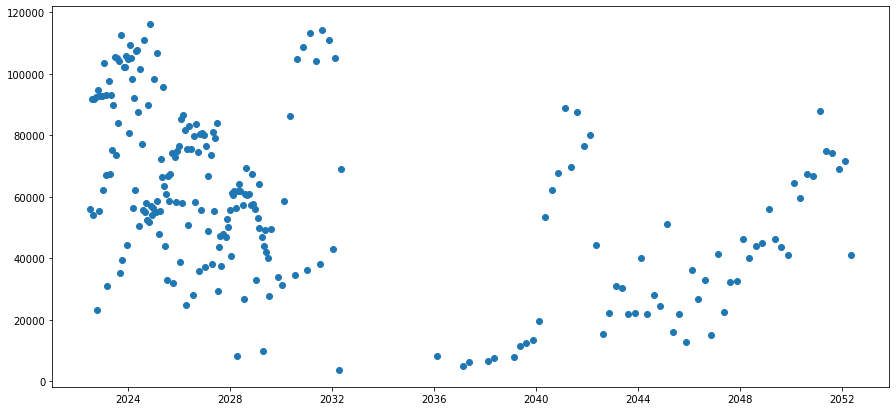

In [4]:
# Problem 1.1 Plot the total amount of outstanding debt maturing at each date

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Import data from sheet 0 in excel
df = pd.read_excel('../data/treasury_quotes_2022-06-30.xlsx')
# Use df.head() to see some data to ensure import worked
# df.head()

# Get all debt in numpy array
ask_price_by_mat_date = df[['tmatdt', 'tdpubout']].to_numpy()

# Create dictionary, with date as key and sum of tdask as value
grouped_date_dictionary = {}
for elem in ask_price_by_mat_date:
  if elem[0] not in grouped_date_dictionary:
    grouped_date_dictionary[elem[0]] = []
  grouped_date_dictionary[elem[0]].append(elem[1:])

for key in grouped_date_dictionary:
  grouped_date_dictionary[key] = [sum(i) for i in zip(*grouped_date_dictionary[key])]

# order the dictionary by date for plotting on a timeseries
ordered_data = OrderedDict(sorted(grouped_date_dictionary.items()))

# print(ordered_data)
# print(dict)

# Plot the data
date = ordered_data.keys()
value = ordered_data.values()
# print(date)

fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(date, value);
plt.scatter(date, value);

<AxesSubplot:xlabel='Maturity Date', ylabel='Outstanding Debt'>

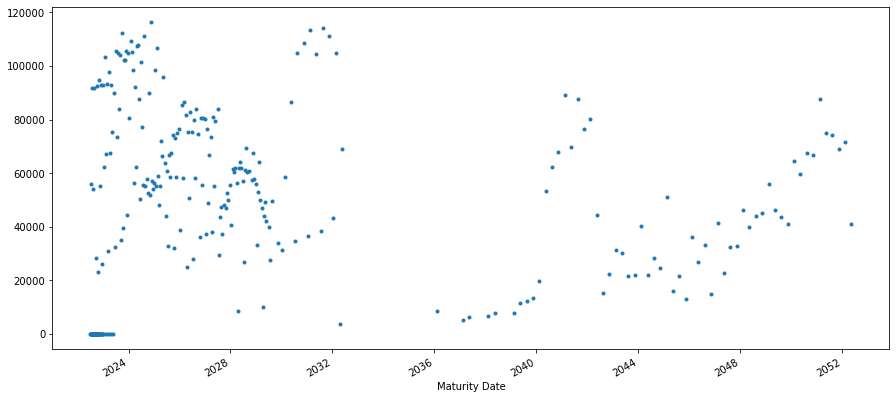

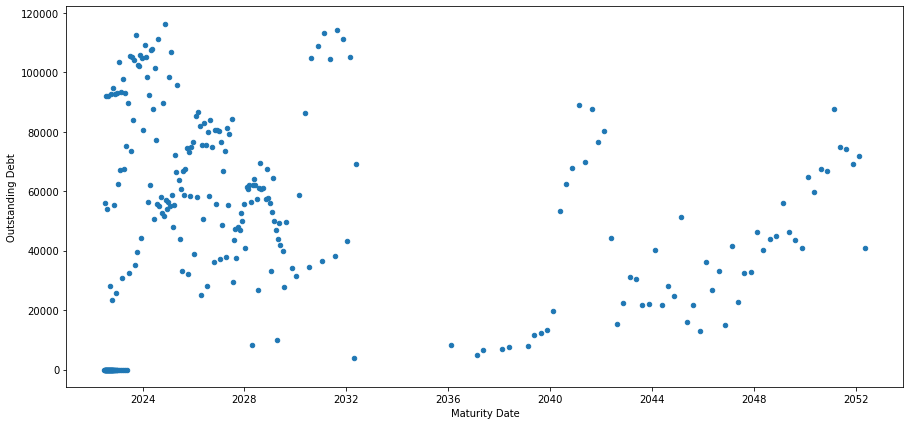

In [171]:
# Problem 1.1 Plot the total amount of outstanding debt maturing at each date
# Using Mark's example from class as a template

# Import data from excel and sort by maturity date
rawdata = pd.read_excel('../data/treasury_quotes_2022-06-30.xlsx')
rawdata.columns = rawdata.columns.str.upper()
rawdata.sort_values('TMATDT',inplace=True)

# Data transformation
metrics = rawdata.copy()[['TMATDT', 'TDPUBOUT']]
metrics.columns = ['Maturity Date', 'Outstanding Debt']
metrics.groupby(['Maturity Date'])['Outstanding Debt'].sum().plot(style='.', figsize=(15,7))

grouped = metrics.groupby(['Maturity Date'])['Outstanding Debt'].sum().reset_index()
grouped.plot.scatter(x='Maturity Date',y='Outstanding Debt',figsize=(15,7))

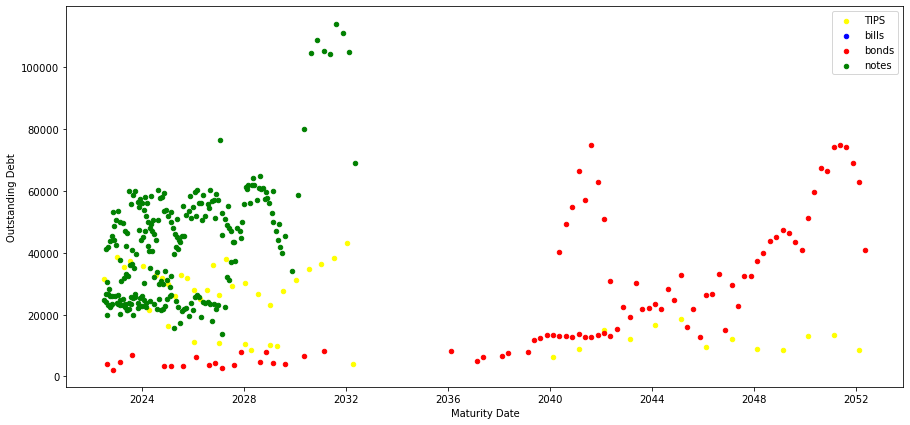

In [155]:
# Problem 1.2 Plot the amount of outstanding debt maturing at each date, 
#      segmented by bonds, notes, TIPS (combined ITYPE of 11 and 12.)

# Import data from excel and sort by maturity date
rawdata = pd.read_excel('../data/treasury_quotes_2022-06-30.xlsx')
rawdata.columns = rawdata.columns.str.upper()
rawdata.sort_values('TMATDT',inplace=True)

# Data transformation
metrics = rawdata.copy()[['TMATDT', 'TDPUBOUT', 'ITYPE']]
metrics.columns = ['Maturity Date', 'Outstanding Debt', 'Type']

# replace type key with value
# 1: bonds
# 2: notes
# 4: bills
# 11: TIPS notes
# 12: TIPS bonds
metrics['Type'] = metrics['Type'].replace({1:'bonds', 2:'notes', 4:'bills', 11:'TIPS', 12:'TIPS'})

# Group data by maturity date and type so you can sum, then reset index to get back to array
metrics.groupby(['Maturity Date', 'Type'])['Outstanding Debt'].sum().reset_index().head(15)

colors = {'bonds':'red', 'notes':'green', 'bills':'blue', 'TIPS':'yellow'}
fig, ax = plt.subplots(figsize=(15,7))

# Group by type for plotting
grouped = metrics.groupby('Type')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Maturity Date', y='Outstanding Debt', label=key, color=colors[key])

plt.show()

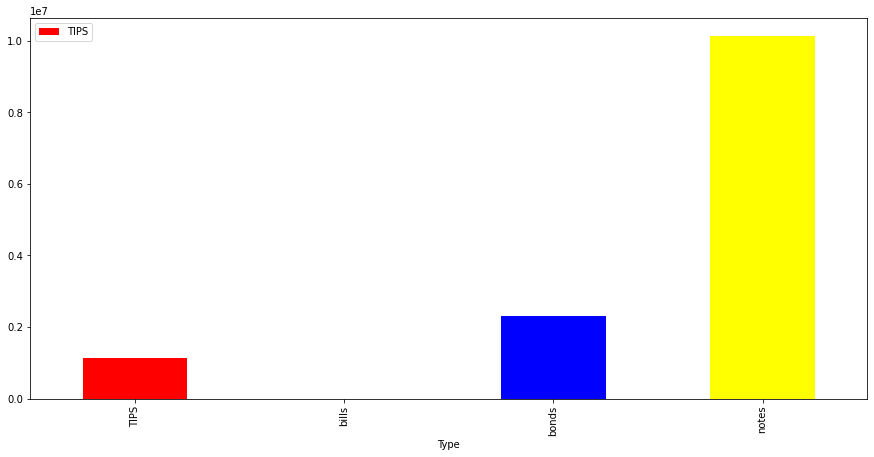

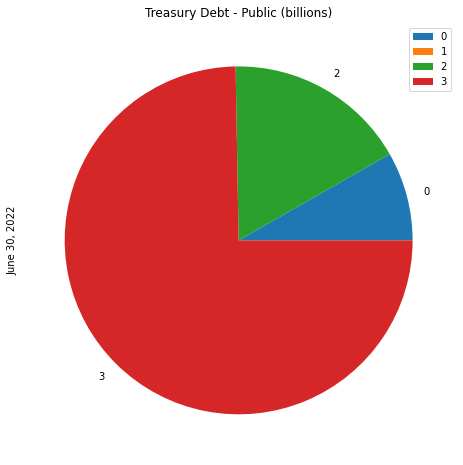

In [187]:
# Problem 1.3 Report the total outstanding debt (summed over all maturity dates),
#      segmented by bonds, notes, TIPS

# Import data from excel and sort by maturity date
rawdata = pd.read_excel('../data/treasury_quotes_2022-06-30.xlsx')
rawdata.columns = rawdata.columns.str.upper()

# Data transformation
metrics = rawdata.copy()[['TDPUBOUT', 'ITYPE']]
metrics.columns = ['Outstanding Debt', 'Type']

# replace type key with value
# 1: bonds
# 2: notes
# 4: bills
# 11: TIPS notes
# 12: TIPS bonds
metrics['Type'] = metrics['Type'].replace({1:'bonds', 2:'notes', 4:'bills', 11:'TIPS', 12:'TIPS'})

# Group data by type so you can sum, then reset index to get back to array
grouped = metrics.groupby('Type')['Outstanding Debt'].sum().reset_index()
colors = {'bonds':'red', 'notes':'green', 'bills':'blue', 'TIPS':'yellow'}
fig, ax = plt.subplots(figsize=(15,7))

grouped.plot(ax=ax, kind='bar', x='Type', y='Outstanding Debt', color=['red', 'green', 'blue', 'yellow'])
# TODO: What is going on with the legend????
plt.legend(['TIPS', 'bills', 'bonds', 'notes'])
plt.show()

# Problem 1.4
grouped.plot.pie(y=grouped.columns[1],figsize=(8,8),title='Treasury Debt - Public (billions)',ylabel='June 30, 2022')
plt.show()

# 2 Time-to-Maturity

## 2.1

Calculate the time-to-maturity (relative to the quote date) for each issue.

Use the `TMATDT` column to get the maturity date.

Report the summary statistics of these time-to-maturities. (Consider using .describe()).

## 2.2
Plot the time-to-maturity against the provided YTM, (column `TDYLD`.)

<AxesSubplot:xlabel='Time to Maturity (days)', ylabel='YTM'>

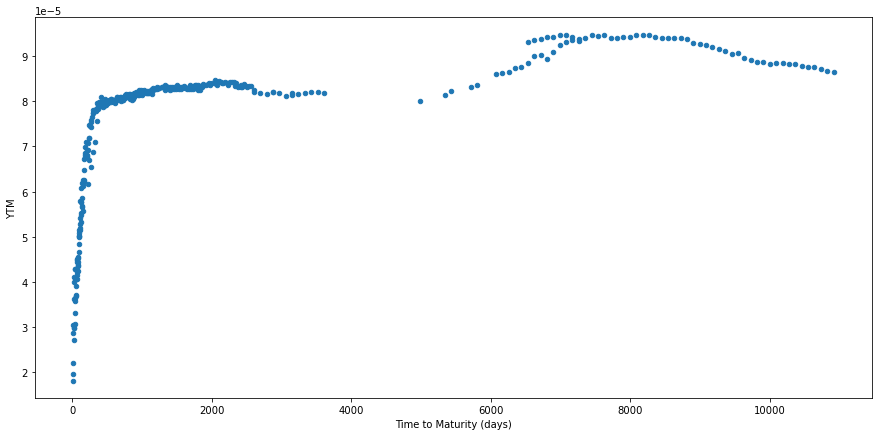

In [5]:
# Problem 2.1 Calculate the time-to-maturity (relative to the quote date) for each issue.

# Import data from excel and sort by maturity date
rawdata = pd.read_excel('../data/treasury_quotes_2022-06-30.xlsx')
rawdata.columns = rawdata.columns.str.upper()
rawdata.sort_values('TMATDT',inplace=True)

# Data transformation
metrics = rawdata.copy()[['KYTREASNO','TMATDT']]
metrics['Time to Maturity'] = metrics['TMATDT']-datetime(2022, 6, 30)
metrics.describe(datetime_is_numeric=True)

# Problem 2.2 Plot the time-to-maturity against the provided YTM, (column `TDYLD`)
metrics['YTM']=rawdata.copy()[['TDYLD']]
metrics['Time to Maturity (days)']=metrics['Time to Maturity'].dt.days
metrics.plot.scatter(x='Time to Maturity (days)',y='YTM',figsize=(15,7))

# 3 Yields and Prices

## 3.1

For the Treasury bills, calculate the **discount yields**.

Identify the T-bills using `ITYPE`=4 or looking for `TCOUPRT` of 0.

## 3.2

Write a function to calculate the yield-to-maturity for each issue. You will need to use a nonlinear solver to solve for the YTM.

## 3.3
Conceptual question, no outside data needed.

Consider a Treasury with...
* maturity 2 years
* face value 100
* coupon rate 4\%, semiannual
* current yield-to-maturity is 3\%


1. Calculate the price of the treasury.
1. Suppose that both its YTM and coupon rate go up by 0.5\%. What is the revised price of this Treasury?

In [13]:
# 3.1 For the Treasury bills, calculate the discount yields.
# Data transformation
metrics = rawdata.copy()[['TDASK', 'ITYPE']]

bills = metrics[metrics['ITYPE']==4] 
bills['DY'] = 3 * ((100 - bills['TDASK']).div(100))
print(bills)
# Discount Yield = (360/n)*((100-P)/100)

# 3.2- come back to this

# 3.3

         TDASK  ITYPE        DY
370  99.990972      4  0.000271
345  99.986389      4  0.000408
371  99.963667      4  0.001090
309  99.960139      4  0.001196
375  99.943792      4  0.001686
350  99.936417      4  0.001907
372  99.922722      4  0.002318
352  99.924556      4  0.002263
365  99.899167      4  0.003025
354  99.884792      4  0.003456
382  99.857778      4  0.004267
313  99.850667      4  0.004480
385  99.826361      4  0.005209
359  99.820333      4  0.005390
384  99.781750      4  0.006547
358  99.781444      4  0.006557
383  99.753458      4  0.007396
363  99.734875      4  0.007954
393  99.719500      4  0.008415
323  99.702500      4  0.008925
399  99.683333      4  0.009500
373  99.668472      4  0.009946
403  99.642389      4  0.010728
376  99.627833      4  0.011165
404  99.606917      4  0.011792
380  99.587972      4  0.012361
413  99.520000      4  0.014400
326  99.527694      4  0.014169
419  99.472125      4  0.015836
387  99.461875      4  0.016144
420  99.

C:\Users\madrs\AppData\Local\Temp\ipykernel_26724\2764868682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bills['DY'] = 3 * (((100 - bills['TDASK']).div(100)))


# 4 Short-Term Rates

Use the data in `data/ref_rates.xlsx` to explore several key rates that are used as benchmarks for floating rates.
* SOFR
* Fed funds
* 3-month T-bill yield

Calculate the correlation between the three rates (filtering to the dates for which they all have reported values.)

Do this correlation analysis for the data in
* levels (as provided)
* differences (day-over-day changes)